In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas
import seaborn
import numpy as np
from statannot import add_stat_annotation

In [8]:
reader_dict = {'R_BC_Reader_01':'R_01', 'R_BC_Reader_02':'R_02', 'R_BC_Reader_03':'R_03',
               'R_BC_Reader_05':'R_04', 'R_BC_Reader_06':'R_05', 'R_BC_Reader_07':'R_06',
               'R_BC_Reader_08':'R_07', 'R_BC_Reader_09':'R_08'}

In [9]:
patient_dict = {'BP_2018_0031':'P_01', 'BP_2018_0076':'P_02', 'BP_2018_0168':'P_03', 'BP_2018_0220':'P_04',
                'BP_2018_0254':'P_05', 'BP_2018_0268':'P_06', 'BP_2018_0299':'P_07', 'BP_2018_0415':'P_08',
                'BP_2018_0481':'P_09', 'BP_2018_0558':'P_10', 'BP_2018_0619':'P_11', 'BP_2018_0660':'P_12',
                'BP_2018_0671':'P_13', 'BP_2018_0672':'P_14', 'BP_2018_0861':'P_15', 'BP_2018_0945':'P_16',
                'BP_2018_1001':'P_17', 'BP_2018_1018':'P_18', 'BP_2018_1023':'P_19', 'BP_2018_1024':'P_20'}

In [10]:
# Fig 2.c - Accuracy assessment
df_res = pandas.read_csv('dices_reader12.csv')
for patient_id in patient_dict.keys():
    df_res['Patient_ID'] = df_res['Patient_ID'].replace(patient_id, patient_dict[patient_id])
for reader_id in reader_dict.keys():
    df_res['Reader_ID'] = df_res['Reader_ID'].replace(reader_id, reader_dict[reader_id])

In [11]:
# Fig 2.b - Agreement assessment
dices = pandas.read_csv('dices_reader_EXx.csv')
for patient_id in patient_dict.keys():
    dices['Patient_ID'] = dices['Patient_ID'].replace(patient_id, patient_dict[patient_id])

In [12]:
# Fig 2.a - Time assessment
df_time = pandas.read_csv('contouring_times_for_figs.csv')

In [13]:
blues = ['#cbdbea', '#78aac8', '#336fa2']
order = ['EX1', 'EX2', 'AI']

(a)
1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided P_val=3.849e-17 U_stat=1.977e+04
(b)
EX1 v.s. EX2: Mann-Whitney-Wilcoxon test two-sided P_val=4.061e-110 U_stat=3.612e+04
(c)
EX1 v.s. EX2: Mann-Whitney-Wilcoxon test two-sided P_val=4.800e-01 U_stat=1.338e+04
EX2 v.s. AI: Mann-Whitney-Wilcoxon test two-sided P_val=9.988e-02 U_stat=1.238e+03
EX1 v.s. AI: Mann-Whitney-Wilcoxon test two-sided P_val=1.969e-01 U_stat=1.316e+03


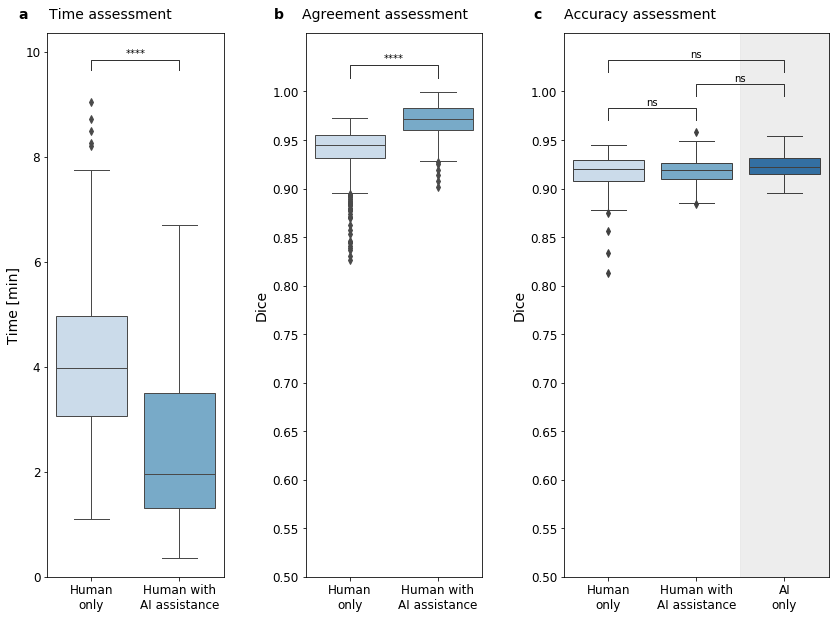

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(14,10), gridspec_kw={'width_ratios': [2, 2, 3]})
plt.subplots_adjust(wspace = 0.4)

####################################################################################################
print '(a)'
ax[0] = seaborn.boxplot(ax=ax[0], whis=1.5, x="Run", y="time_min", data=df_time, palette="Blues", linewidth=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel('')
ax[0].set_ylabel('Time [min]', fontsize=14)
ax[0].tick_params(labelsize=12)
ax[0].set(xticklabels = ['Human\nonly','Human with\nAI assistance'])

test_pairs = [(1, 2)]
add_stat_annotation(ax=ax[0], data=df_time, x="Run", y="time_min", box_pairs=[(1, 2)],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,
                    linewidth=1)

ax[0].artists[0].set_facecolor(blues[0])
ax[0].artists[1].set_facecolor(blues[1])

####################################################################################################
print '(b)'
ax[1] = seaborn.boxplot(ax=ax[1], x="Data_Set", y="Dice", data=dices, palette="Blues", linewidth=1)
ax[1].set_ylim([0.5, 1.2])
ax[1].set_yticks(np.arange(0.5, 1.01, 0.05))
ax[1].set_xlabel('')
ax[1].set_ylabel('Dice', fontsize=14)
ax[1].tick_params(labelsize=12)
ax[1].set(xticklabels = ['Human\nonly','Human with\nAI assistance'])

test_pairs = [('EX1', 'EX2')]
add_stat_annotation(ax=ax[1], data=dices, x="Data_Set", y="Dice", box_pairs=test_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, max_y_lim=1.06,
                    line_offset_to_box=0.02, line_offset=0.001, linewidth=1)

ax[1].artists[0].set_facecolor(blues[0])
ax[1].artists[1].set_facecolor(blues[1])

####################################################################################################
print '(c)'
ax[2] = seaborn.boxplot(ax=ax[2], x="Data_Set", y="Dice", data=df_res,
                        palette="Blues", order=order, linewidth=1)
ax[2].set_ylim([0.5, 1.1])
ax[2].set_yticks(np.arange(0.5, 1.01, 0.05))
ax[2].set_xlabel('')
ax[2].set_ylabel('Dice', fontsize=14)
ax[2].tick_params(labelsize=12)
ax[2].set(xticklabels = ['Human\nonly','Human with\nAI assistance', 'AI\nonly'])

test_pairs = [('EX1', 'EX2'), ('EX2', 'AI'), ('EX1', 'AI')]
add_stat_annotation(ax=ax[2], data=df_res, order=order,
                    x="Data_Set", y="Dice", box_pairs=test_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, max_y_lim=1.06,
                    line_offset_to_box=0.02, line_offset=0.001, linewidth=1)

ax[2].artists[0].set_facecolor(blues[0])
ax[2].artists[1].set_facecolor(blues[1])
ax[2].artists[2].set_facecolor(blues[2])
ax[2].axvspan(1.5, 2.5, alpha=0.5, color='#dddddd', zorder=-1)

ta1 = plt.text(-6.7, 1.075, r'$\bf{a}$', fontsize=14)
tb1 = plt.text(-3.8, 1.075, r'$\bf{b}$', fontsize=14)
tc1 = plt.text(-0.85, 1.075, r'$\bf{c}$', fontsize=14)

ta2 = plt.text(-6.35, 1.075, r'Time assessment', fontsize=14)
tb2 = plt.text(-3.48, 1.075, r'Agreement assessment', fontsize=14)
tc2 = plt.text(-0.5, 1.075, r'Accuracy assessment', fontsize=14)

plt.show()